## idea:
Do senior riders ride the bike for a different duration? (People in the United States who are more than sixty years of age are commonly referred to as senior citizens or seniors, defination from https://legal-dictionary.thefreedictionary.com/Senior+Citizens )

- the idea is specified and clearified according to linda's comments
- explain the reason for choosing the margin for birth year
- choose not to use linda's idea of baby boomers, because the data is not enoguh for such age group

## Null Hypothesis: 

The average trip duration of senior riders, those who are older than 60, is the same as the avergae trip duration of younger riders in year 2015

- specified the target dependent var as the average tripduration according to linda's comments
- restructered the h0 to a two-tailed test according to linda's suggestions



## Alternative Hypothesis:

The average trip duration of senior riders is not the same as average trip duration of younger riders


## Formulated Hypothesis

##### t0 = average trip duration for rider born beofre or in 1958
##### t1 = average trip duration for rider born after 1958

#### _$H_0$_ : t0 = t1
#### _$H_1$_ : t0 != t1
OR

#### _$H_0$_ : t0 - t1 = 0
#### _$H_1$_ : t0 - t1 != 0


## Significance Level

I will use a significance level of $\alpha=0.05$

which means i want the probability of getting a result at least as significant as mine to be less then 5

### Phase 1: Collect data from Citi Bike

In [2]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as st
import random
from statsmodels.graphics.regressionplots import abline_plot
%matplotlib inline
import os

####### Prof. Bianco's method to ensure that the variable PUIDATA exists. (Modified) #######

os.environ["PUI2018"] = "%s/PUI2018"%os.getenv("HOME")
if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
    
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

In [3]:
###### Prof. Bianco's method to download the data file into PUIdata folder. #######

def getCitiBikeCSV(datestring):
#     print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

#     else:
#         print ("file in place, you can continue")


In [4]:
###### Prof. Bianco's method to download data. ######

date = 201500
for i in range(12):
    date += 1
    getCitiBikeCSV(str(date))
# datestring = '201511'
# getCitiBikeCSV(datestring)


In [5]:
##### Prof. Bianco's method to read data into df. ######
datelist = range(201501, 201513)
ls = []
for i in datelist:
    temp = pd.read_csv(os.getenv("PUIDATA") + "/" + str(i) + '-citibike-tripdata.csv')
    ls.append(temp)
# data = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [6]:
data = pd.concat(ls)

In [6]:
data.shape

(9937969, 15)

In [7]:
data.dropna(inplace=True)
data = data[['tripduration', 'birth year']]
data.head()

,tripduration,birth year
0,1346,1960.0
1,363,1963.0
2,346,1974.0
3,182,1969.0
4,969,1977.0


### Phase 2: Prepare the data

In [8]:
data.dropna(inplace=True)
data = data[['tripduration', 'birth year']]
data.head()

,tripduration,birth year
0,1346,1960.0
1,363,1963.0
2,346,1974.0
3,182,1969.0
4,969,1977.0


In [9]:
# group data by birth year and means
group = data.groupby('birth year').mean()

In [10]:
year = 2015
age = 60

In [11]:
# divide into senior and young riders
old = group[group.index <= (year-age)]
young = group[group.index > (year-age)]

### Phase 3: Plot the data

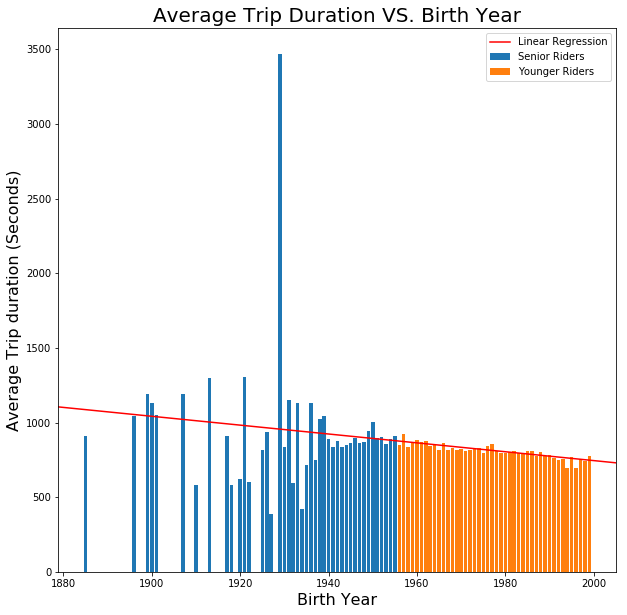

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(old.index, old.tripduration, label='Senior Riders')
ax.bar(young.index, young.tripduration, label='Younger Riders')
plt.xlabel('Birth Year', fontsize=16)
plt.ylabel('Average Trip duration (Seconds)', fontsize=16)
plt.title('Average Trip Duration VS. Birth Year', fontsize=20)

# fit a line
model = pd.DataFrame()
model['y'] = group.tripduration
model['x'] = group.index
f = smf.ols(formula='y ~ x', data=model).fit()
fig = abline_plot(model_results=f, ax=ax, color='red', label='Linear Regression')
ax.legend()

### Phase 4: Hypothesis Testing
#### _$H_0$_ : t0 - t1 = 0
#### _$H_1$_ : t0 - t1 != 0

As Rufei Sheng suggested, a two-sample t test should be performed to test the relationship between the two sample means.

In [13]:
# randomly sample the data
random.seed(20181104)
old_sample = np.random.choice(old.tripduration, 30, replace= False)
young_sample = np.random.choice(young.tripduration, 30, replace= False)

In [14]:
# two sample mean, test if the two samples have the same mean
t_score = st.ttest_rel(old_sample, young_sample, nan_policy='omit')
t_score

Ttest_relResult(statistic=1.9751576757190208, pvalue=0.057837405686611228)

#### Conclusion
alpha = 0.05

returned_p = 0.006

t_statistic = 2.957, df = 30 + 30 -2

reject h0 because p < alpha and t > t_critical

t statistics suggest that h0 can be rejected at the significance level of 0.05

Therefore, we can safely reject the null hypothesis that t0 - t1 = 0, or t0 = t1, or the average tripduration is the same for senior riders and younger riders, which means that the average trip duration is not the same for the senior and younger riders.